Sveučilište u Zagrebu<br>
Fakultet elektrotehnike i računarstva

## Uvod u znanost o podacima

# Poboljšanje rezultata

In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import random
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [3]:
clanci = pd.read_csv("my_data/data/clanci_split.csv", index_col = 0)
clanci.head()

,TOPICS,BODY
0,'cocoa',showers continued throughout week bahia cocoa zone alleviating drought since early january improving prospects coming temporao although normal humidity levels restored comissaria smith said weekly review period means temporao late year arrivals week ended february bags kilos making cumulative total season stage last year seems cocoa delivered earlier consignment included arrivals figures comissaria smith said still doubt much crop cocoa still available harvesting practically come total bahia crop estimates around bags sales standing almost hundred thousand bags still hands farmers middlemen exporters processors doubts much cocoa would export shippers experiencing dificulties obtaining bahia superior certificates view lower quality recent weeks farmers sold good part cocoa held consignment comissaria smith said spot bean prices rose cruzados arroba kilos bean shippers reluctant offer nearby shipment limited sales booked march shipment dlrs tonne ports named crop sales also light open ports june july going dlrs dlrs york july sept dlrs tonne routine sales butter made march april sold dlrs april butter went times york june july dlrs sept dlrs times york sept dlrs times york comissaria smith said destinations covertible currency areas uruguay open ports cake sales registered dlrs march april dlrs dlrs times york buyers argentina uruguay convertible currency areas liquor sales limited march april selling dlrs june july dlrs times york july sept dlrs times york sept times york comissaria smith said total bahia sales currently estimated bags crop bags crop final figures period february expected published brazilian cocoa trade commission carnival ends midday february reuter
1,'grain',agriculture department reported farmer owned reserve national five average price february follows dlrs sorghum natl loan release call avge rate level price price wheat corn rates natl loan release call avge rate level price price oats barley sorghum reserves matured level reflects grain entered feedgrain july wheat level wheat barley corn sorghum level covers wheat entered january rates dlrs available reuter
2,'wheat',agriculture department reported farmer owned reserve national five average price february follows dlrs sorghum natl loan release call avge rate level price price wheat corn rates natl loan release call avge rate level price price oats barley sorghum reserves matured level reflects grain entered feedgrain july wheat level wheat barley corn sorghum level covers wheat entered january rates dlrs available reuter
3,'corn',agriculture department reported farmer owned reserve national five average price february follows dlrs sorghum natl loan release call avge rate level price price wheat corn rates natl loan release call avge rate level price price oats barley sorghum reserves matured level reflects grain entered feedgrain july wheat level wheat barley corn sorghum level covers wheat entered january rates dlrs available reuter
4,'barley',agriculture department reported farmer owned reserve national five average price february follows dlrs sorghum natl loan release call avge rate level price price wheat corn rates natl loan release call avge rate level price price oats barley sorghum reserves matured level reflects grain entered feedgrain july wheat level wheat barley corn sorghum level covers wheat entered january rates dlrs available reuter


## Jezgre i funkcije (iz prošlog dijela)

In [4]:
import kernels.wk as wk
import kernels.ngk as ngk
import kernels.ssk as ssk

wk_kernel = lambda x, y: wk(x, y)

def wkGmats(trainDocs, testDocs):
    vectorizer = CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None, stop_words = "english", input='content') 

    train_data_features = vectorizer.fit_transform(trainDocs)
    train_data_features = train_data_features.toarray()

    transformer = TfidfTransformer(smooth_idf=True)
    tfidf = transformer.fit_transform(train_data_features)
    tfidf = tfidf.toarray() 

    nTrainDocs = len(tfidf)
    GmatTrain = np.ones((nTrainDocs,nTrainDocs))

    for i in range( 0, nTrainDocs ):
        for j in range(0,nTrainDocs):
            GmatTrain[i][j] = np.dot(tfidf[i], tfidf[j])
            
    n_features_train = len(tfidf[0])
    
    train_data_features = vectorizer.transform(testDocs)
    train_data_features = train_data_features.toarray()

    transformer = TfidfTransformer(smooth_idf=True)
    tfidfTest = transformer.fit_transform(train_data_features)
    tfidfTest = tfidfTest.toarray() 

    nTestDocs = len(tfidfTest)
    GmatTest = np.ones((nTestDocs,nTrainDocs))

    for i in range( 0, nTestDocs ):
        for j in range(0,nTrainDocs):
            GmatTest[i][j] = np.dot(tfidfTest[i], tfidf[j])
    
    return GmatTrain, GmatTest

def ssk_compute_train_gram(docs, kernel=None):
    n = len(docs)
    gram = np.ones((n, n))
    print("SSK compute train gram...")
    for x in range(n):
        #print('{0:.2f}%'.format(x / n * 100))
        for y in range(x + 1, n):
            gram[x, y] = kernel(docs[x], docs[y])
            gram[y, x] = gram[x, y]
    return gram  

def ssk_compute_test_gram(test, train, kernel=None):
    gram = np.zeros((len(test), len(train)))
    print("SSK compute test gram...")
    for x in range(len(test)):
        #print('{0:.2f}%'.format(x / len(test) * 100))
        for y in range(len(train)):
            gram[x, y] = kernel(test[x], train[y])
    return gram

def give_train_test_split(dataframe, give_train):
    earn_clanci = dataframe[dataframe.TOPICS.str.contains("earn")]
    acq_clanci = dataframe[dataframe.TOPICS.str.contains("acq")]
    crude_clanci = dataframe[dataframe.TOPICS.str.contains("crude")]
    corn_clanci = dataframe[dataframe.TOPICS.str.contains("corn")]

    clanci = [earn_clanci, acq_clanci, crude_clanci, corn_clanci]
    [earn_tr, earn_te] = train_test_split(earn_clanci, train_size=152/len(earn_clanci), test_size=40/len(earn_clanci))
    [acq_tr, acq_te] = train_test_split(acq_clanci, train_size=114/len(acq_clanci), test_size=25/len(acq_clanci))
    [crude_tr, crude_te] = train_test_split(crude_clanci, train_size=76/len(crude_clanci), test_size=15/len(crude_clanci))
    [corn_tr, corn_te] = train_test_split(corn_clanci, train_size=38/len(corn_clanci), test_size=10/len(corn_clanci))

    y_train = []
    y_train.extend(['earn' for i in range(0, len(earn_tr))])
    y_train.extend(['acq' for i in range(0, len(acq_tr))])
    y_train.extend(['crude' for i in range(0, len(crude_tr))])
    y_train.extend(['corn' for i in range(0, len(corn_tr))])
    y_train = np.array(y_train)
    #print(y_train)

    y_test = []
    y_test.extend(['earn' for i in range(0, len(earn_te))])
    y_test.extend(['acq' for i in range(0, len(acq_te))])
    y_test.extend(['crude' for i in range(0, len(crude_te))])
    y_test.extend(['corn' for i in range(0, len(corn_te))])
    y_test = np.array(y_test)
    #print(y_test)

    clanci_test = [earn_te, acq_te, crude_te, corn_te]
    clanci_test = pd.concat(clanci_test)
    clanci_train = [earn_tr, acq_tr, crude_tr, corn_tr]
    clanci_train = pd.concat(clanci_train)
    
    earn_test=[]
    acq_test=[]
    crude_test=[]
    corn_test=[]
    for index, row in earn_te.iterrows():
        earn_test.append(row['BODY'])
    for index, row in acq_te.iterrows():
        acq_test.append(row['BODY'])
    for index, row in crude_te.iterrows():
        crude_test.append(row['BODY'])
    for index, row in corn_te.iterrows():
        corn_test.append(row['BODY'])
    
    treniranje_parovi = []
    treniranje = []
    i = 0
    for index, row in clanci_train.iterrows():
        par = []
        par = [row['BODY'], y_train[i]]
        treniranje.append(row['BODY'])
        treniranje_parovi.append(par)

    testiranje = []
    for index, row in clanci_test.iterrows():
        testiranje.append(row['BODY'])
    
    if give_train:
        return [treniranje, y_train]
    else:
        return [earn_test, acq_test, crude_test, corn_test, testiranje, y_test]



In [5]:
def ssk_evaluation(dataframe, category, k_range=[5], lambd_range=[0.5], filename="my_data/results/no_file.csv", add_k=False, add_lambd=False, C=1.0, add_C=False):
    rezultat_lista = []

    print("Starting SSK evaluation for {}...".format(category))
    for k in k_range:
        for lambd in lambd_range:
            print("\tk = {}, lambda = {}".format(k, lambd))
            lista_u_ovom_koraku = []
            if add_C:
                lista_u_ovom_koraku.append(C)
            lista_u_ovom_koraku.append(category)
            lista_u_ovom_koraku.append("SSK")
            f1 = []
            precision = []
            recall = []
            for j in range(0, 10):
                [trening, y_trening] = give_train_test_split(dataframe, True)

                #odabire podskup primjera za ucenje jer ih je inace previse i dugo traje
                treniranje = []
                y_train = []
                for i in range(0, 60):
                    r = random.randint(0, len(trening)-1)
                    treniranje.append(trening[r])
                    y_train.append(y_trening[r])

                ssk_kernel = lambda x, y: ssk.ssk(x, y, k, lambd)
                train_gram = ssk_compute_train_gram(treniranje, kernel=ssk_kernel)
                [earn_test, acq_test, crude_test, corn_test, _, _] = give_train_test_split(dataframe, False)
                if(category=="earn"):
                    X_test = earn_test
                    y_true = np.array(['earn' for i in range(0, len(earn_test))])
                elif category == "acq":
                    X_test = acq_test
                    y_true = np.array(['acq' for i in range(0, len(acq_test))])
                elif category == "crude":
                    X_test = crude_test
                    y_true = np.array(['crude' for i in range(0, len(crude_test))])
                else:
                    X_test = corn_test
                    y_true = np.array(['corn' for i in range(0, len(corn_test))])

                test_gram = ssk_compute_test_gram(X_test, treniranje, kernel=ssk_kernel)
                clf = SVC(kernel='precomputed', C=C)
                clf.fit(train_gram, y_train)
                # predikcija
                y_pred = clf.predict(test_gram)
                f1.append(f1_score(y_true, y_pred, average='micro'))
                precision.append(precision_score(y_true, y_pred, average='micro'))
                recall.append(recall_score(y_true, y_pred, average='micro'))
            # kraj j petlje
        
            if add_k:
                lista_u_ovom_koraku.append(k)
            if add_lambd:
                lista_u_ovom_koraku.append(lambd)
            
            lista_u_ovom_koraku.append(round(np.mean(f1), 4))
            lista_u_ovom_koraku.append(round(np.std(f1), 4))
            lista_u_ovom_koraku.append(round(np.mean(precision), 4))
            lista_u_ovom_koraku.append(round(np.std(precision), 4))
            lista_u_ovom_koraku.append(round(np.mean(recall), 4))
            lista_u_ovom_koraku.append(round(np.std(recall), 4))
        
            rez = pd.DataFrame([lista_u_ovom_koraku])
            rez.to_csv(filename, mode='a', header=False)       
        
            rezultat_lista.append(lista_u_ovom_koraku)
    print("End of SSK evaluation\n")
    return rezultat_lista

def ngk_evaluation(dataframe, category, k_range=[5], add_k = False, add_lambd = False, filename="my_data/results/no_file.csv", C=1.0, add_C=False):
    rezultat_lista = []
    
    print("Starting NGK evaluation for {}...".format(category))
    for k in k_range:
        lista_u_ovom_koraku = []
        if add_C:
            lista_u_ovom_koraku.append(C)
        lista_u_ovom_koraku.append(category)
        lista_u_ovom_koraku.append("NGK")
        print("\t k =", k)
        f1 = []
        precision = []
        recall = []
        for i in range(0, 10):
            #treniranje jezgre
            [trening, y_trening] = give_train_test_split(dataframe, True)
            
            #odabire podskup primjera za ucenje jer ih je inace previse i dugo traje
            treniranje = []
            y_train = []
            for i in range(0, 60):
                r = random.randint(0, len(trening)-1)
                treniranje.append(trening[r])
                y_train.append(y_trening[r])
        
            [earn_test, acq_test, crude_test, corn_test, _, _] = give_train_test_split(dataframe, False)
            if(category=="earn"):
                X_test = earn_test
                y_true = np.array(['earn' for i in range(0, len(earn_test))])
            elif category == "acq":
                X_test = acq_test
                y_true = np.array(['acq' for i in range(0, len(acq_test))])
            elif category == "crude":
                X_test = crude_test
                y_true = np.array(['crude' for i in range(0, len(crude_test))])
            else:
                X_test = corn_test
                y_true = np.array(['corn' for i in range(0, len(corn_test))])

            train_gram, test_gram = ngk.ngkGmats(treniranje, X_test, n=k)
            clf = SVC(kernel='precomputed', C=C)
            clf.fit(train_gram, y_train)
            y_pred = clf.predict(test_gram)
            f1.append(round(f1_score(y_true, y_pred, average='micro'), 3))
            precision.append(round(precision_score(y_true, y_pred, average='micro'), 3))
            recall.append(round(recall_score(y_true, y_pred, average='micro'), 3))
        
        if add_k:
            lista_u_ovom_koraku.append(k)
        if add_lambd:
            lista_u_ovom_koraku.append(0)            
        
        lista_u_ovom_koraku.append(round(np.mean(f1), 4))
        lista_u_ovom_koraku.append(round(np.std(f1), 4))
        lista_u_ovom_koraku.append(round(np.mean(precision), 4))
        lista_u_ovom_koraku.append(round(np.std(precision), 4))
        lista_u_ovom_koraku.append(round(np.mean(recall), 4))
        lista_u_ovom_koraku.append(round(np.std(recall), 4))
        
        rez = pd.DataFrame([lista_u_ovom_koraku])
        rez.to_csv(filename, mode='a', header=False)      
        
        rezultat_lista.append(lista_u_ovom_koraku)
        #print(lista_u_ovom_koraku)
    print("End of NGK evaluation\n")
    return rezultat_lista
        
def wk_evaluation(dataframe, category, add_k = False, add_lambd = False, filename="my_data/results/no_file.csv", C=1.0, add_C=False):
    rezultat_lista = []
    if add_C:
        rezultat_lista.append(C)
    rezultat_lista.append(category)
    rezultat_lista.append("WK")

    f1 = []
    precision = []
    recall = []
    print("Starting WK evaluation for {}...".format(category))
    for i in range(0, 10):
        #print(category, i)
        #treniranje jezgre
        
        [trening, y_trening] = give_train_test_split(dataframe, True)
            
        #odabire podskup primjera za ucenje jer ih je inace previse i dugo traje
        treniranje = []
        y_train = []
        for i in range(0, 60):
            r = random.randint(0, len(trening)-1)
            treniranje.append(trening[r])
            y_train.append(y_trening[r])
        
        [earn_test, acq_test, crude_test, corn_test, _, _] = give_train_test_split(dataframe, False)
        if(category=="earn"):
            X_test = earn_test
            y_true = np.array(['earn' for i in range(0, len(earn_test))])
        elif category == "acq":
            X_test = acq_test
            y_true = np.array(['acq' for i in range(0, len(acq_test))])
        elif category == "crude":
            X_test = crude_test
            y_true = np.array(['crude' for i in range(0, len(crude_test))])
        else:
            X_test = corn_test
            y_true = np.array(['corn' for i in range(0, len(corn_test))])

        wk_kernel = lambda x, y: wk(x, y)
        [wk_train_gram, wk_test_gram] = wkGmats(treniranje, X_test)
        clf = SVC(kernel='precomputed', C=C)
        clf.fit(wk_train_gram, y_train)
        y_pred = clf.predict(wk_test_gram)
        f1.append(round(f1_score(y_true, y_pred, average='micro'), 3))
        precision.append(round(precision_score(y_true, y_pred, average='micro'), 3))
        recall.append(round(recall_score(y_true, y_pred, average='micro'), 3))
        
    if add_k:
        rezultat_lista.append(0)
    if add_lambd:
        rezultat_lista.append(0)            
        
    rezultat_lista.append(round(np.mean(f1), 4))
    rezultat_lista.append(round(np.std(f1), 4))
    rezultat_lista.append(round(np.mean(precision), 4))
    rezultat_lista.append(round(np.std(precision), 4))
    rezultat_lista.append(round(np.mean(recall), 4))
    rezultat_lista.append(round(np.std(recall), 4))
    
    rez = pd.DataFrame([rezultat_lista])
    rez.to_csv(filename, mode='a', header=False) 
    
    print("End of WK evaluation\n")
    return [rezultat_lista]


## Zadržavanje samo korijena riječi

Želimo sve riječi u članku svesti na njihove korijene. Npr. riječi playing, plays, played su različite riječi, ali ih želimo svesti na play. Tako ćemo povećati sličnost članaka.

In [6]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Klara\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Klara\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [7]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [8]:
def lemmatize(body):
    novi_body = ""
    for word in body.split(" "):
        novi_body += wordnet_lemmatizer.lemmatize(word, pos="v")
        novi_body += " "
    return novi_body

In [9]:
clanci_stem = clanci.copy()
clanci_stem['BODY'] = clanci_stem.apply(lambda row: lemmatize(row.BODY), axis=1)
clanci.to_csv("my_data/data/clanci_stem.csv")
clanci_stem.head()

,TOPICS,BODY
0,'cocoa',shower continue throughout week bahia cocoa zone alleviate drought since early january improve prospect come temporao although normal humidity level restore comissaria smith say weekly review period mean temporao late year arrivals week end february bag kilos make cumulative total season stage last year seem cocoa deliver earlier consignment include arrivals figure comissaria smith say still doubt much crop cocoa still available harvest practically come total bahia crop estimate around bag sales stand almost hundred thousand bag still hand farmers middlemen exporters processors doubt much cocoa would export shippers experience dificulties obtain bahia superior certificate view lower quality recent weeks farmers sell good part cocoa hold consignment comissaria smith say spot bean price rise cruzados arroba kilos bean shippers reluctant offer nearby shipment limit sales book march shipment dlrs tonne port name crop sales also light open port june july go dlrs dlrs york july sept dlrs tonne routine sales butter make march april sell dlrs april butter go time york june july dlrs sept dlrs time york sept dlrs time york comissaria smith say destinations covertible currency areas uruguay open port cake sales register dlrs march april dlrs dlrs time york buyers argentina uruguay convertible currency areas liquor sales limit march april sell dlrs june july dlrs time york july sept dlrs time york sept time york comissaria smith say total bahia sales currently estimate bag crop bag crop final figure period february expect publish brazilian cocoa trade commission carnival end midday february reuter
1,'grain',agriculture department report farmer own reserve national five average price february follow dlrs sorghum natl loan release call avge rate level price price wheat corn rat natl loan release call avge rate level price price oats barley sorghum reserve mature level reflect grain enter feedgrain july wheat level wheat barley corn sorghum level cover wheat enter january rat dlrs available reuter
2,'wheat',agriculture department report farmer own reserve national five average price february follow dlrs sorghum natl loan release call avge rate level price price wheat corn rat natl loan release call avge rate level price price oats barley sorghum reserve mature level reflect grain enter feedgrain july wheat level wheat barley corn sorghum level cover wheat enter january rat dlrs available reuter
3,'corn',agriculture department report farmer own reserve national five average price february follow dlrs sorghum natl loan release call avge rate level price price wheat corn rat natl loan release call avge rate level price price oats barley sorghum reserve mature level reflect grain enter feedgrain july wheat level wheat barley corn sorghum level cover wheat enter january rat dlrs available reuter
4,'barley',agriculture department report farmer own reserve national five average price february follow dlrs sorghum natl loan release call avge rate level price price wheat corn rat natl loan release call avge rate level price price oats barley sorghum reserve mature level reflect grain enter feedgrain july wheat level wheat barley corn sorghum level cover wheat enter january rat dlrs available reuter


### Usporedba rezultata 1.1

In [10]:
def evaluation_for_varying_sequence_lengths(filename_to, filename_from):
    rezultat = []
    varying_sequence_length = pd.DataFrame(rezultat, columns=["category", "ime ljuske", "k", "f1_mean", "f1_std", "precision_mean", "precision_std", "recall_mean", "recall_std"])
    varying_sequence_length.to_csv(filename_to)
    
    dataframe = pd.read_csv(filename_from)
    
    k_range = [3, 5, 7, 10]
    
    rezultat = ngk_evaluation(dataframe, "earn", k_range=[*range(3, 10+1, 1)], filename=filename_to, add_k = True)
    
    rezultat = ssk_evaluation(dataframe, "earn", k_range=k_range, filename=filename_to, add_k=True)
    
    rezultat = wk_evaluation(dataframe, "earn", filename=filename_to, add_k = True)
    
    rezultat = ngk_evaluation(dataframe,"acq", k_range=[*range(3, 10+1, 1)], filename=filename_to, add_k = True)
    
    rezultat = ssk_evaluation(dataframe,"acq", k_range=k_range, filename=filename_to, add_k=True)
    
    rezultat = wk_evaluation(dataframe,"acq", filename=filename_to, add_k = True)
    
    rezultat = ngk_evaluation(dataframe,"crude", k_range=[*range(3, 10+1, 1)], filename=filename_to, add_k = True)
    
    rezultat = ssk_evaluation(dataframe,"crude", k_range=k_range, filename=filename_to, add_k=True)
    
    rezultat = wk_evaluation(dataframe,"crude", filename=filename_to, add_k = True)
    
    rezultat = ngk_evaluation(dataframe,"corn", k_range=[*range(3, 10+1, 1)], filename=filename_to, add_k = True)
    
    rezultat = ssk_evaluation(dataframe,"corn", k_range=k_range, filename=filename_to, add_k=True)

    rezultat = wk_evaluation(dataframe,"corn", filename=filename_to, add_k = True)
    
#evaluation_for_varying_sequence_lengths("my_data/results/improvement_varying_sequence_length.csv", filename_from="my_data/data/clanci_stem.csv")

In [11]:
filename = "my_data/results/improvement_varying_sequence_length.csv"
rezultat = pd.read_csv(filename, index_col=[0, 1, 2, 3])
display(rezultat)

f1_mean  f1_std  precision_mean  precision_std  \
  category ime ljuske k                                                    
0 earn     NGK        3    0.8075  0.0613          0.8075         0.0613   
                      4    0.8575  0.0603          0.8575         0.0603   
                      5    0.8700  0.0820          0.8700         0.0820   
                      6    0.8225  0.1267          0.8225         0.1267   
                      7    0.8675  0.0942          0.8675         0.0942   
                      8    0.8225  0.1143          0.8225         0.1143   
                      9    0.8875  0.0930          0.8875         0.0930   
                      10   0.8500  0.1294          0.8500         0.1294   
           SSK        3    0.7975  0.1027          0.7975         0.1027   
                      5    0.8575  0.0603          0.8575         0.0603   
                      7    0.8450  0.0999          0.8450         0.0999   
                      10   0.9625  0.0584          0.9625         0.0584   
           WK         0    0.8100  0.0527          0.8100         0.0527   
  acq      NGK        3    0.8760  0.1065          0.8760         0.1065   
                      4    0.9000  0.0863          0.9000         0.0863   
                      5    0.9080  0.1630          0.9080         0.1630   
                      6    0.9240  0.0902          0.9240         0.0902   
                      7    0.7640  0.2757          0.7640         0.2757   
                      8    0.8240  0.1755          0.8240         0.1755   
                      9    0.6640  0.3649          0.6640         0.3649   
                      10   0.8080  0.2827          0.8080         0.2827   
           SSK        3    0.8840  0.2482          0.8840         0.2482   
                      5    0.8880  0.2585          0.8880         0.2585   
                      7    0.9200  0.1440          0.9200         0.1440   
                      10   0.2800  0.3478          0.2800         0.3478   
           WK         0    0.9480  0.0475          0.9480         0.0475   
  crude    NGK        3    0.5333  0.2732          0.5333         0.2732   
                      4    0.6199  0.3253          0.6199         0.3253   
                      5    0.4065  0.3090          0.4065         0.3090   
                      6    0.6668  0.2440          0.6668         0.2440   
                      7    0.4468  0.2193          0.4468         0.2193   
                      8    0.2468  0.2565          0.2468         0.2565   
                      9    0.3866  0.2472          0.3866         0.2472   
                      10   0.2801  0.2491          0.2801         0.2491   
           SSK        3    0.4533  0.4329          0.4533         0.4329   
                      5    0.6800  0.2187          0.6800         0.2187   
                      7    0.3600  0.2939          0.3600         0.2939   
                      10   0.0467  0.0600          0.0467         0.0600   
           WK         0    0.5667  0.2720          0.5667         0.2720   
  corn     NGK        3    0.2300  0.2100          0.2300         0.2100   
                      4    0.3500  0.2419          0.3500         0.2419   
                      5    0.2300  0.2571          0.2300         0.2571   
                      6    0.1100  0.1136          0.1100         0.1136   
                      7    0.1400  0.2289          0.1400         0.2289   
                      8    0.1000  0.1265          0.1000         0.1265   
                      9    0.0500  0.0922          0.0500         0.0922   
                      10   0.0500  0.0922          0.0500         0.0922   
           SSK        3    0.1100  0.1221          0.1100         0.1221   
                      5    0.1700  0.2002          0.1700         0.2002   
                      7    0.1800  0.2676          0.1800         0.2676   
                      10   0.0400  0.0490          0.0400         0.0490  

#### Komentar

Na linijskim grafovima (dolje) vidimo da smo uspjeli postići barem malo poboljšanje nakon što smo zadržali samo korijene riječi

In [12]:
rezultat_before = pd.read_csv("my_data/results/varying_sequence_length.csv", index_col=[0, 1, 2, 3])
rezultat_after = pd.read_csv("my_data/results/improvement_varying_sequence_length.csv", index_col=[0, 1, 2, 3])

grupirano_before = rezultat_before.groupby(["category", "ime ljuske"]).mean()
#display(grupirano_before)
grupirano_after = rezultat_after.groupby(["category", "ime ljuske"]).mean()
#display(grupirano_after)

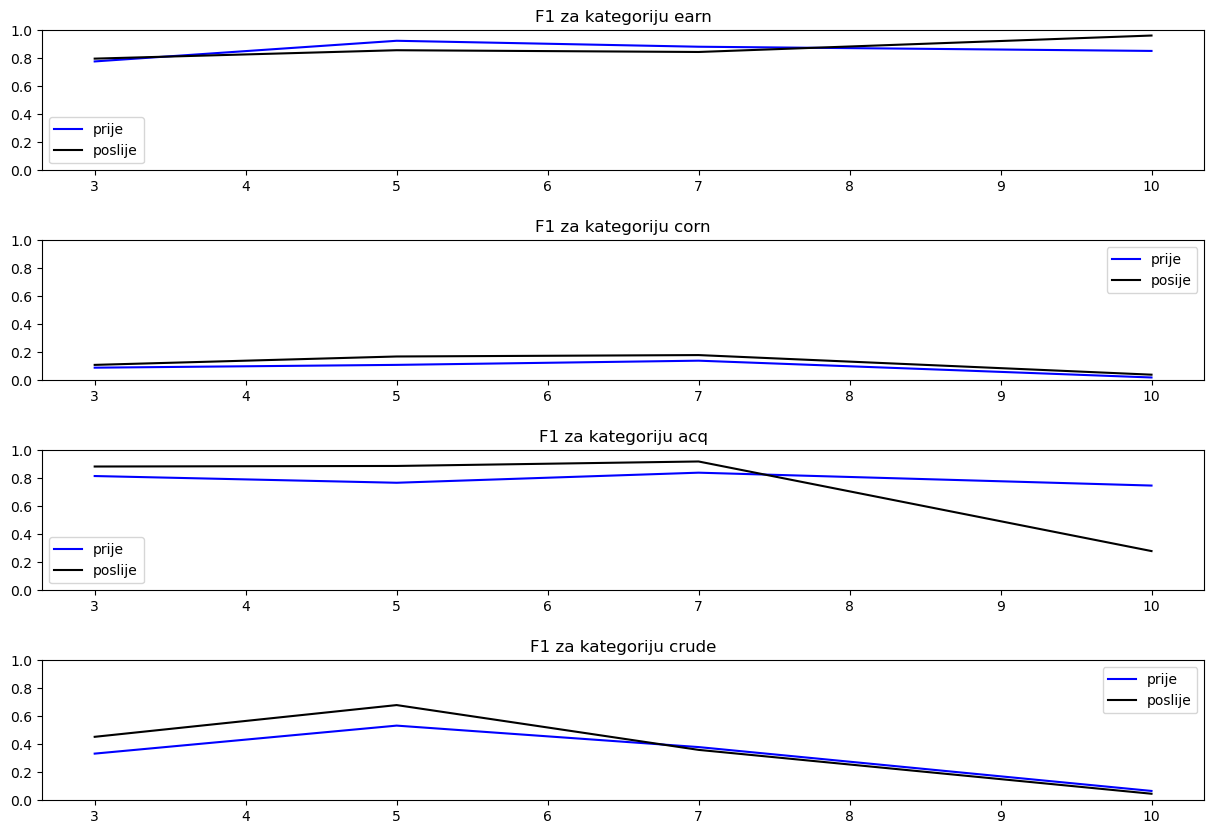

In [13]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(15, 10))
k_range = [3, 5, 7, 10]

rezultat_before = pd.read_csv("my_data/results/varying_sequence_length.csv")
rezultat_after = pd.read_csv("my_data/results/improvement_varying_sequence_length.csv")

# before
ax1.plot(k_range, rezultat_before[(rezultat_before.category == 'earn') & (rezultat_before['ime ljuske'] == 'SSK')].f1_mean, color='b', label="prije")
ax2.plot(k_range, rezultat_before[(rezultat_before.category == 'corn') & (rezultat_before['ime ljuske'] == 'SSK')].f1_mean, color='b', label="prije")
ax3.plot(k_range, rezultat_before[(rezultat_before.category == 'acq') & (rezultat_before['ime ljuske'] == 'SSK')].f1_mean, color='b', label="prije")
ax4.plot(k_range, rezultat_before[(rezultat_before.category == 'crude') & (rezultat_before['ime ljuske'] == 'SSK')].f1_mean, color='b', label="prije")

# after
ax1.plot(k_range, rezultat_after[(rezultat_after.category == 'earn') & (rezultat_after['ime ljuske'] == 'SSK')].f1_mean, color='k', label="poslije")
ax2.plot(k_range, rezultat_after[(rezultat_after.category == 'corn') & (rezultat_after['ime ljuske'] == 'SSK')].f1_mean, color='k', label="posije")
ax3.plot(k_range, rezultat_after[(rezultat_after.category == 'acq') & (rezultat_after['ime ljuske'] == 'SSK')].f1_mean, color='k', label="poslije")
ax4.plot(k_range, rezultat_after[(rezultat_after.category == 'crude') & (rezultat_after['ime ljuske'] == 'SSK')].f1_mean, color='k', label="poslije")

ax1.set_ylim([0, 1])
ax1.set_title("F1 za kategoriju earn")
ax1.legend()
ax2.set_ylim([0, 1])
ax2.set_title("F1 za kategoriju corn")
ax2.legend()
ax3.set_ylim([0, 1])
ax3.set_title("F1 za kategoriju acq")
ax3.legend()
ax4.set_ylim([0, 1])
ax4.set_title("F1 za kategoriju crude")
ax4.legend()

fig.subplots_adjust(hspace=0.5)
plt.show()


### Usporedba rezultata 1.2

In [14]:
def evaluation_for_varying_weight_decay_factors(filename, filename_from):
    rezultat = []
    varying_weight_decay = pd.DataFrame(rezultat, columns=["category", "ime ljuske", "lambda", "f1_mean", "f1_std", "precision_mean", "precision_std", "recall_mean", "recall_std"])
    varying_weight_decay.to_csv(filename)
    
    dataframe = pd.read_csv(filename_from)
        
    #l_range = [0.01, 0.03, 0.05, 0.07, 0.09, 0.1, 0.3, 0.5, 0.7, 0.9]
    l_range = [0.01, 0.05, 0.3, 0.7]
    
    rezultat = ngk_evaluation(dataframe,"earn", filename=filename, add_lambd=True)
    
    rezultat = ssk_evaluation(dataframe,"earn", lambd_range=l_range, filename=filename)
    
    rezultat = wk_evaluation(dataframe,"earn", filename=filename, add_lambd=True)
    
    rezultat = ngk_evaluation(dataframe,"acq", filename=filename, add_lambd=True)
    
    rezultat = ssk_evaluation(dataframe,"acq", lambd_range=l_range, filename=filename)
    
    rezultat = wk_evaluation(dataframe,"acq", filename=filename, add_lambd=True)
    
    rezultat = ngk_evaluation(dataframe,"crude", filename=filename, add_lambd=True)
    
    rezultat = ssk_evaluation(dataframe,"crude", lambd_range=l_range, filename=filename)
    
    rezultat = wk_evaluation(dataframe,"crude", filename=filename, add_lambd=True)
    
    rezultat = ngk_evaluation(dataframe,"corn", filename=filename, add_lambd=True)
    
    rezultat = ssk_evaluation(dataframe,"corn", lambd_range=l_range, filename=filename)
    
    rezultat = wk_evaluation(dataframe,"corn", filename=filename, add_lambd=True)

#evaluation_for_varying_weight_decay_factors("my_data/results/improvement_varying_weight_decay.csv", "my_data/data/clanci_stem.csv")

In [15]:
filename = "my_data/results/improvement_varying_weight_decay.csv"
rezultat = pd.read_csv(filename, index_col=[0, 1, 2, 3])
display(rezultat)

f1_mean  f1_std  precision_mean  precision_std  \
  category ime ljuske lambda                                                   
0 earn     NGK        0.00     0.9000  0.0716          0.9000         0.0716   
           SSK        0.01     0.8825  0.0690          0.8825         0.0690   
                      0.05     0.8550  0.0947          0.8550         0.0947   
                      0.30     0.8425  0.0652          0.8425         0.0652   
                      0.70     0.8500  0.1026          0.7850         0.1026   
           WK         0.00     0.9225  0.0675          0.9225         0.0675   
  acq      NGK        0.00     0.9280  0.0776          0.9280         0.0776   
           SSK        0.01     0.9360  0.0720          0.9360         0.0720   
                      0.05     0.9280  0.1100          0.9280         0.1100   
                      0.30     0.9640  0.0418          0.9640         0.0418   
                      0.70     0.7840  0.2673          0.7840         0.2673   
           WK         0.00     0.8560  0.2461          0.8560         0.2461   
  crude    NGK        0.00     0.5467  0.2104          0.5467         0.2104   
           SSK        0.01     0.6467  0.2750          0.6467         0.2750   
                      0.05     0.5933  0.2299          0.5933         0.2299   
                      0.30     0.6933  0.3214          0.6933         0.3214   
                      0.70     0.4933  0.3844          0.4933         0.3844   
           WK         0.00     0.6001  0.2547          0.6001         0.2547   
  corn     NGK        0.00     0.2200  0.2358          0.2200         0.2358   
           SSK        0.01     0.2600  0.2059          0.2600         0.2059   
                      0.05     0.1800  0.2135          0.1800         0.2135   
                      0.30     0.2100  0.2166          0.2100         0.2166   
                      0.70     0.0600  0.1020          0.0600         0.1020   
           WK         0.00     0.3400  0.3105          0.3400         0.3105   

                              recall_mean  recall_std  
  category ime ljuske lambda                           
0 earn     NGK        0.00         0.9000      0.0716  
           SSK        0.01         0.8825      0.0690  
                      0.05         0.8550      0.0947  
                      0.30         0.8425      0.0652  
                      0.70         0.7850      0.1026  
           WK         0.00         0.9225      0.0675  
  acq      NGK        0.00         0.9280      0.0776  
           SSK        0.01         0.9360      0.0720  
                      0.05         0.9280      0.1100  
                      0.30         0.9640      0.0418  
                      0.70         0.7840      0.2673  
           WK         0.00         0.8560      0.2461  
  crude    NGK        0.00         0.5467      0.2104  
           SSK        0.01         0.6467      0.2750  
                      0.05         0.5933      0.2299  
                      0.30         0.6933      0.3214  
                      0.70         0.4933      0.3844  
           WK         0.00         0.6001      0.2547  
  corn     NGK        0.00         0.2200      0.2358  
           SSK        0.01         0.2600      0.2059  
                      0.05         0.1800      0.2135  
                      0.30         0.2100      0.2166  
                      0.70         0.0600      0.1020  
           WK         0.00         0.3400      0.3105

#### Komentar

Na linijskim grafovima (dolje) vidimo da ovim postupkom nije postignuto veliko poboljšanje.

In [16]:
grupirano = rezultat.groupby(["category", "ime ljuske"]).mean()
display(grupirano)

f1_mean    f1_std  precision_mean  precision_std  \
category ime ljuske                                                     
acq      NGK         0.92800  0.077600         0.92800       0.077600   
         SSK         0.90300  0.122775         0.90300       0.122775   
         WK          0.85600  0.246100         0.85600       0.246100   
corn     NGK         0.22000  0.235800         0.22000       0.235800   
         SSK         0.17750  0.184500         0.17750       0.184500   
         WK          0.34000  0.310500         0.34000       0.310500   
crude    NGK         0.54670  0.210400         0.54670       0.210400   
         SSK         0.60665  0.302675         0.60665       0.302675   
         WK          0.60010  0.254700         0.60010       0.254700   
earn     NGK         0.90000  0.071600         0.90000       0.071600   
         SSK         0.85750  0.082875         0.84125       0.082875   
         WK          0.92250  0.067500         0.92250       0.067500   

                     recall_mean  recall_std  
category ime ljuske                           
acq      NGK             0.92800    0.077600  
         SSK             0.90300    0.122775  
         WK              0.85600    0.246100  
corn     NGK             0.22000    0.235800  
         SSK             0.17750    0.184500  
         WK              0.34000    0.310500  
crude    NGK             0.54670    0.210400  
         SSK             0.60665    0.302675  
         WK              0.60010    0.254700  
earn     NGK             0.90000    0.071600  
         SSK             0.84125    0.082875  
         WK              0.92250    0.067500

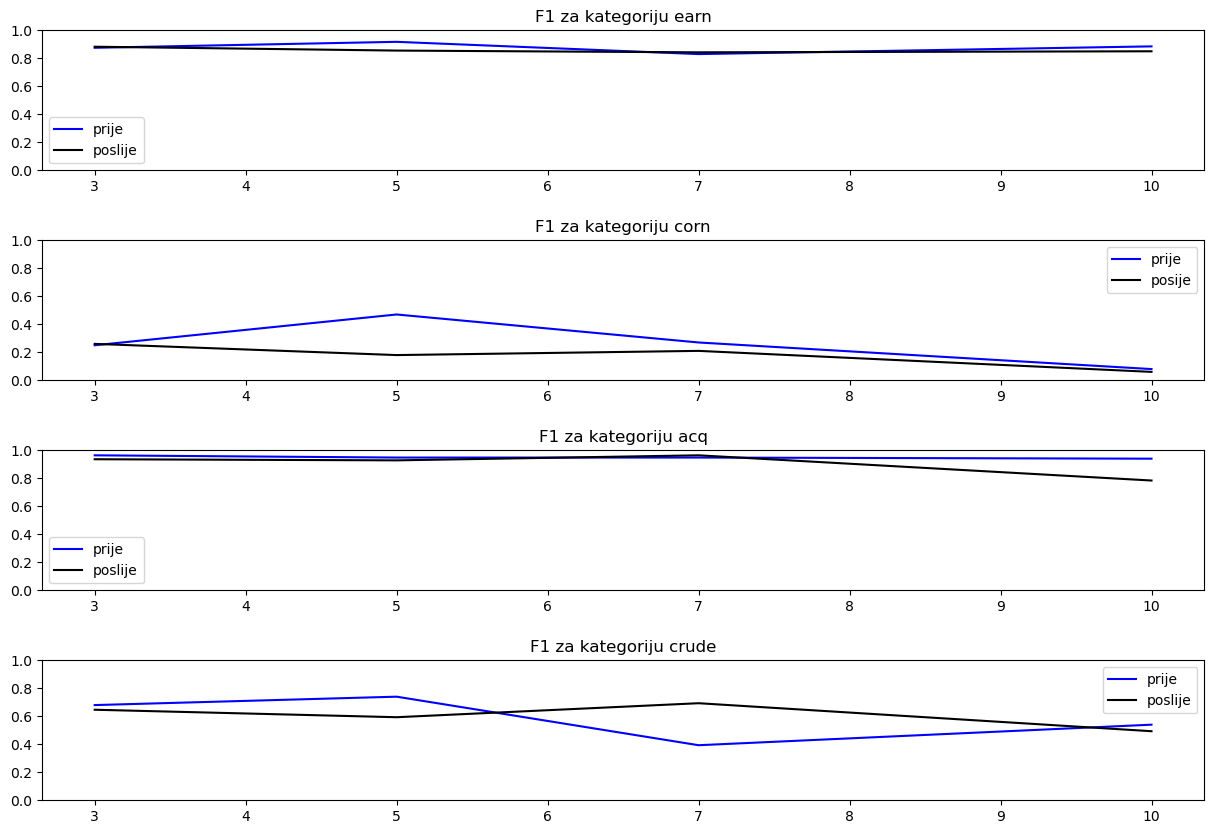

In [17]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(15, 10))
k_range = [3, 5, 7, 10]

rezultat_before = pd.read_csv("my_data/results/varying_weight_decay.csv")
rezultat_after = pd.read_csv("my_data/results/improvement_varying_weight_decay.csv")

# before
ax1.plot(k_range, rezultat_before[(rezultat_before.category == 'earn') & (rezultat_before['ime ljuske'] == 'SSK')].f1_mean, color='b', label="prije")
ax2.plot(k_range, rezultat_before[(rezultat_before.category == 'corn') & (rezultat_before['ime ljuske'] == 'SSK')].f1_mean, color='b', label="prije")
ax3.plot(k_range, rezultat_before[(rezultat_before.category == 'acq') & (rezultat_before['ime ljuske'] == 'SSK')].f1_mean, color='b', label="prije")
ax4.plot(k_range, rezultat_before[(rezultat_before.category == 'crude') & (rezultat_before['ime ljuske'] == 'SSK')].f1_mean, color='b', label="prije")

# after
ax1.plot(k_range, rezultat_after[(rezultat_after.category == 'earn') & (rezultat_after['ime ljuske'] == 'SSK')].f1_mean, color='k', label="poslije")
ax2.plot(k_range, rezultat_after[(rezultat_after.category == 'corn') & (rezultat_after['ime ljuske'] == 'SSK')].f1_mean, color='k', label="posije")
ax3.plot(k_range, rezultat_after[(rezultat_after.category == 'acq') & (rezultat_after['ime ljuske'] == 'SSK')].f1_mean, color='k', label="poslije")
ax4.plot(k_range, rezultat_after[(rezultat_after.category == 'crude') & (rezultat_after['ime ljuske'] == 'SSK')].f1_mean, color='k', label="poslije")

ax1.set_ylim([0, 1])
ax1.set_title("F1 za kategoriju earn")
ax1.legend()
ax2.set_ylim([0, 1])
ax2.set_title("F1 za kategoriju corn")
ax2.legend()
ax3.set_ylim([0, 1])
ax3.set_title("F1 za kategoriju acq")
ax3.legend()
ax4.set_ylim([0, 1])
ax4.set_title("F1 za kategoriju crude")
ax4.legend()

fig.subplots_adjust(hspace=0.5)
plt.show()


## Zadržavanje samo najčešćih riječi ? (subset features?)

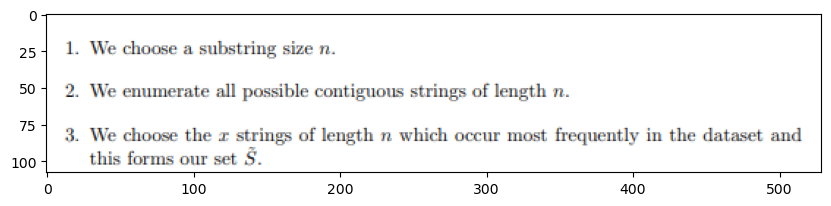

In [18]:
img = plt.imread("aproximation.png")
fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(img)
plt.show()

# Optimiranje parametara

U znanstvenom radu su evaluirali rad jezgri mijenjajući samo jednu varijablu (k ili ${\lambda}$), dok bi druga bila postavljena na konstantnu vrijednost. Mi ćemo ovdje pokušati naći optimalne vrijednosti parametara k i ${\lambda}$. Optimalne vrijednosti su one za koje je F1 najveći.

In [19]:
def k_and_lambd_evaluation(filename, filename_from):
    rezultat = []
    k_and_lambd = pd.DataFrame(rezultat, columns=["category", "ime ljuske", "k", "lambda", "f1_mean", "f1_std", "precision_mean", "precision_std", "recall_mean", "recall_std"])
    k_and_lambd.to_csv(filename)
    
    dataframe = pd.read_csv(filename_from)
    
    #l_range = [0.01, 0.03, 0.05, 0.07, 0.09, 0.1, 0.3, 0.5, 0.7, 0.9]
    #k_range = [*range(3, 10+1, 1)]
    l_range = [0.01, 0.05, 0.3, 0.7]
    k_range=[3, 5, 7, 10]
    
    rezultat = ngk_evaluation(dataframe, "earn", k_range=k_range, add_lambd=True, filename=filename, add_k=True)
    
    rezultat = ssk_evaluation(dataframe, "earn", k_range=k_range, lambd_range=l_range, filename=filename, add_k=True, add_lambd=True)
    
    rezultat = wk_evaluation(dataframe, "earn", filename=filename, add_k=True, add_lambd=True)
    
    rezultat = ngk_evaluation(dataframe,"acq", k_range=k_range, add_lambd=True, filename=filename, add_k=True)
    
    rezultat = ssk_evaluation(dataframe,"acq", k_range=k_range, lambd_range=l_range, filename=filename, add_k=True, add_lambd=True)
    
    rezultat = wk_evaluation(dataframe,"acq", filename=filename, add_k=True, add_lambd=True)
    
    rezultat = ngk_evaluation(dataframe,"crude", k_range=k_range, add_lambd=True, filename=filename, add_k=True)
    
    rezultat = ssk_evaluation(dataframe,"crude", k_range=k_range, lambd_range=l_range, filename=filename, add_k=True, add_lambd=True)
    
    rezultat = wk_evaluation(dataframe,"crude", filename=filename, add_k=True, add_lambd=True)
    
    rezultat = ngk_evaluation(dataframe,"corn", k_range=k_range, add_lambd=True, filename=filename, add_k=True)
    
    rezultat = ssk_evaluation(dataframe,"corn", k_range=k_range, lambd_range=l_range, filename=filename, add_k=True, add_lambd=True)

    rezultat = wk_evaluation(dataframe,"corn", filename=filename, add_k=True, add_lambd=True)
    
#k_and_lambd_evaluation("my_data/results/improvement_varying_seq_length_and_weight_decay.csv", "my_data/data/clanci_stem.csv")


#### Komentar

In [20]:
filename = "my_data/results/improvement_varying_seq_length_and_weight_decay.csv"
rezultat = pd.read_csv(filename, index_col=[0, 1, 2, 3, 4])
display(rezultat)

f1_mean  f1_std  precision_mean  \
  category ime ljuske k  lambda                                    
0 earn     NGK        3  0.00     0.7675  0.0633          0.7675   
                      4  0.00     0.8375  0.0744          0.8375   
                      5  0.00     0.8775  0.0945          0.8775   
                      6  0.00     0.8525  0.0786          0.8525   
                      7  0.00     0.8550  0.0748          0.8550   
                      8  0.00     0.8975  0.1075          0.8975   
                      9  0.00     0.9050  0.0705          0.9050   
                      10 0.00     0.9275  0.1034          0.9275   
           SSK        3  0.01     0.8375  0.0957          0.8375   
                         0.03     0.8375  0.0437          0.8375   
                         0.05     0.8750  0.0733          0.8750   
                         0.07     0.8225  0.0675          0.8225   
                         0.09     0.8525  0.0745          0.8525   
                         0.10     0.8325  0.0434          0.8325   
                         0.30     0.8200  0.0650          0.8200   
                         0.50     0.7925  0.0633          0.7925   
                         0.70     0.7700  0.1054          0.7700   
                         0.90     0.8100  0.1744          0.8100   
                      4  0.01     0.8500  0.0487          0.8500   
                         0.03     0.8425  0.0874          0.8425   
                         0.05     0.8875  0.0562          0.8875   
                         0.07     0.8675  0.0475          0.8675   
                         0.09     0.8650  0.0583          0.8650   
                         0.10     0.8725  0.0855          0.8725   
                         0.30     0.8325  0.0775          0.8325   
                         0.50     0.8125  0.0645          0.8125   
                         0.70     0.7500  0.0725          0.7500   
                         0.90     0.7800  0.1382          0.7800   
                      5  0.01     0.8925  0.0725          0.8925   
                         0.03     0.7975  0.0810          0.7975   
                         0.05     0.9025  0.0410          0.9025   
                         0.07     0.8800  0.0740          0.8800   
                         0.09     0.8850  0.0882          0.8850   
                         0.10     0.8850  0.0604          0.8850   
                         0.30     0.8775  0.0817          0.8775   
                         0.50     0.8525  0.0541          0.8525   
                         0.70     0.8500  0.0894          0.8500   
                         0.90     0.7400  0.1251          0.7400   
                      6  0.01     0.9000  0.1194          0.9000   
                         0.03     0.8525  0.1015          0.8525   
                         0.05     0.8900  0.0691          0.8900   
                         0.07     0.8750  0.0512          0.8750   
                         0.09     0.8500  0.0707          0.8500   
                         0.10     0.9000  0.0837          0.9000   
                         0.30     0.9075  0.0807          0.9075   
                         0.50     0.8700  0.0600          0.8700   
                         0.70     0.8575  0.0767          0.8575   
                         0.90     0.7175  0.0750          0.7175   
                      7  0.01     0.9150  0.0682          0.9150   
                         0.05     0.9225  0.0647          0.9225   
                         0.30     0.9025  0.0666          0.9025   
                         0.70     0.8725  0.0945          0.8725   
           WK         0  0.00     0.8400  0.0896          0.8400   
  acq      NGK        3  0.00     0.9200  0.0894          0.9200   
                      5  0.00     0.8920  0.1315          0.8920   
                      7  0.00     0.8600  0.2402          0.8600   
                      10 0.00     0.6800  0.2834          0.6800   
           SSK       

Tražimo one k i ${\lambda}$ za koje je F1 najveći za svaku kategoriju i za svaku ljusku.

In [21]:
max_redovi = rezultat.loc[rezultat.groupby(["category", "ime ljuske"])["f1_mean"].idxmax()]  
display(max_redovi)

f1_mean  f1_std  precision_mean  \
  category ime ljuske k  lambda                                    
0 acq      NGK        3  0.00     0.9200  0.0894          0.9200   
           SSK        5  0.05     0.9800  0.0322          0.9800   
           WK         0  0.00     0.8640  0.1353          0.8640   
  corn     NGK        3  0.00     0.3700  0.2968          0.3700   
           SSK        3  0.05     0.4000  0.3098          0.4000   
           WK         0  0.00     0.4200  0.3341          0.4200   
  crude    NGK        3  0.00     0.6198  0.3071          0.6198   
           SSK        5  0.70     0.6933  0.2653          0.6933   
           WK         0  0.00     0.6467  0.1839          0.6467   
  earn     NGK        10 0.00     0.9275  0.1034          0.9275   
           SSK        7  0.05     0.9225  0.0647          0.9225   
           WK         0  0.00     0.8400  0.0896          0.8400   

                                 precision_std  recall_mean  recall_std  
  category ime ljuske k  lambda                                          
0 acq      NGK        3  0.00           0.0894       0.9200      0.0894  
           SSK        5  0.05           0.0322       0.9800      0.0322  
           WK         0  0.00           0.1353       0.8640      0.1353  
  corn     NGK        3  0.00           0.2968       0.3700      0.2968  
           SSK        3  0.05           0.3098       0.4000      0.3098  
           WK         0  0.00           0.3341       0.4200      0.3341  
  crude    NGK        3  0.00           0.3071       0.6198      0.3071  
           SSK        5  0.70           0.2653       0.6933      0.2653  
           WK         0  0.00           0.1839       0.6467      0.1839  
  earn     NGK        10 0.00           0.1034       0.9275      0.1034  
           SSK        7  0.05           0.0647       0.9225      0.0647  
           WK         0  0.00           0.0896       0.8400      0.0896

## Aproksimacija 

## Odabir parametra C

Parametar C utječe na regularizaciju. Što je vrijednost parametra C manja, to je regularizacija veća.

In [22]:
def evaluation_for_varying_C_factors(filename, filename_from):
    rezultat = []
    varying_C_factor = pd.DataFrame(rezultat, columns=["C", "category", "ime ljuske", "f1_mean", "f1_std", "precision_mean", "precision_std", "recall_mean", "recall_std"])
    varying_C_factor.to_csv(filename)
    
    dataframe = pd.read_csv(filename_from)
        
    C_range=[0.01, 1.0, 1000.0]
        
    for c in C_range:
        print("C =", c)
    
        rezultat = ngk_evaluation(dataframe,"earn", filename=filename, add_C=True, C=c)

        rezultat = ssk_evaluation(dataframe,"earn", filename=filename, add_C=True, C=c)

        rezultat = wk_evaluation(dataframe,"earn", filename=filename, add_C=True, C=c)

        rezultat = ngk_evaluation(dataframe,"acq", filename=filename, add_C=True, C=c)

        rezultat = ssk_evaluation(dataframe,"acq", filename=filename, add_C=True, C=c)

        rezultat = wk_evaluation(dataframe,"acq", filename=filename, add_lambd=True, add_C=True, C=c)

        rezultat = ngk_evaluation(dataframe,"crude", filename=filename, add_lambd=True, add_C=True, C=c)

        rezultat = ssk_evaluation(dataframe,"crude", filename=filename, add_C=True, C=c)

        rezultat = wk_evaluation(dataframe,"crude", filename=filename, add_lambd=True, add_C=True, C=c)

        rezultat = ngk_evaluation(dataframe,"corn", filename=filename, add_lambd=True, add_C=True, C=c)

        rezultat = ssk_evaluation(dataframe,"corn", filename=filename, add_C=True, C=c)

        rezultat = wk_evaluation(dataframe,"corn", filename=filename, add_lambd=True, add_C=True, C=c)

evaluation_for_varying_C_factors("my_data/results/improvement_varying_C_factor.csv", "my_data/data/clanci_stem.csv")

C = 0.01
Starting NGK evaluation for earn...
	 k = 5
End of NGK evaluation

Starting SSK evaluation for earn...
	k = 5, lambda = 0.5
SSK compute train gram...
SSK compute test gram...
SSK compute train gram...
SSK compute test gram...
SSK compute train gram...
SSK compute test gram...
SSK compute train gram...
SSK compute test gram...
SSK compute train gram...
SSK compute test gram...
SSK compute train gram...
SSK compute test gram...
SSK compute train gram...
SSK compute test gram...
SSK compute train gram...
SSK compute test gram...
SSK compute train gram...
SSK compute test gram...
SSK compute train gram...
SSK compute test gram...
End of SSK evaluation

Starting WK evaluation for earn...
End of WK evaluation

Starting NGK evaluation for acq...
	 k = 5
End of NGK evaluation

Starting SSK evaluation for acq...
	k = 5, lambda = 0.5
SSK compute train gram...
SSK compute test gram...
SSK compute train gram...
SSK compute test gram...
SSK compute train gram...
SSK compute test gram...
SS

komentirati ako promjena C utječe na rezultate ili ne